In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [97]:
def remove_outliers_iqr(df):
    # Define a function to calculate IQR
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_out


def plot_corr_matrix(df):
    # Plot correlation matrix
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, mask=mask, annot=True, cbar=False, cmap="coolwarm")
    plt.show()


def plot_stroke_pie(df):
    # Visualize the ratio of 'stroke'
    df["stroke"].value_counts().plot(kind="pie", autopct="%1.1f%%")
    plt.show()


def plot_dist(df):
    # Plot histograms for numerical columns
    num_features = df.select_dtypes(include=["int64", "float64"]).columns
    for feature in num_features:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[feature], kde=True)
        plt.title(f"Histogram for {feature}")
        plt.show()

    # Plot bar plots for categorical columns
    cat_features = df.select_dtypes(include=["object", "category"]).columns
    for feature in cat_features:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=df[feature])
        plt.title(f"Bar plot for {feature}")
        plt.show()

In [98]:
# Load the data
path = '/home/stefano/Usevalad_projects/CNR-FL-Platform-Dockerized/Classes/Datasets/stroke-kaggle/healthcare-dataset-stroke-data-raw.csv'
df = pd.read_csv(path)

In [99]:
print(df.shape)
df.head()

(5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [100]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [101]:
# Drop the 'id' column
df = df.drop("id", axis=1)

In [102]:
# Convert to categorical
df["stroke"] = df["stroke"].astype("category")
df["hypertension"] = df["hypertension"].astype("category")
df["heart_disease"] = df["heart_disease"].astype("category")

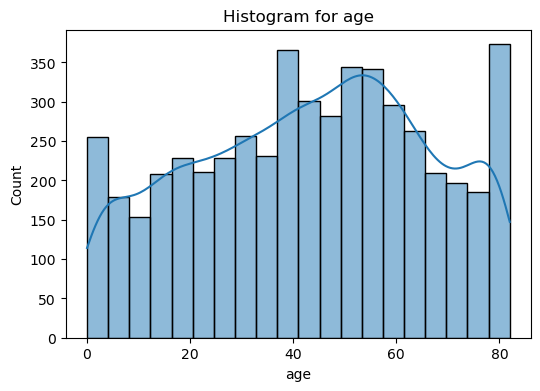

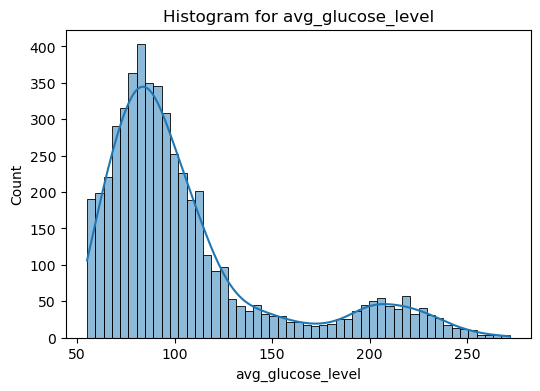

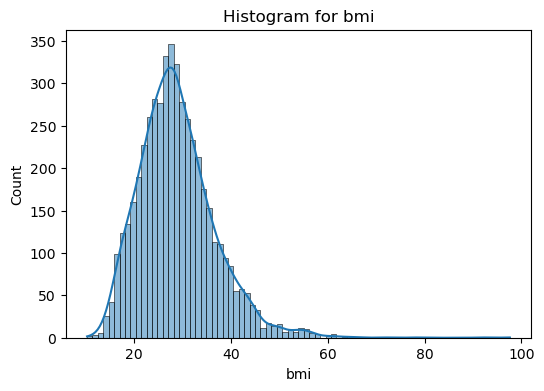

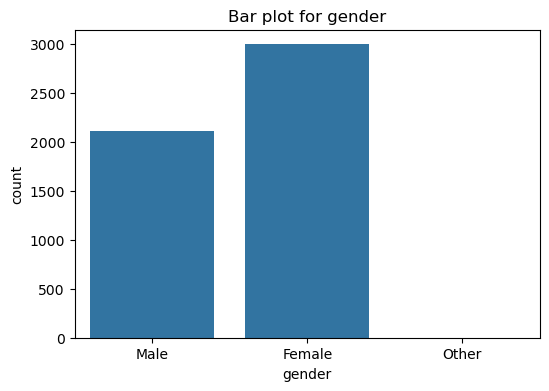

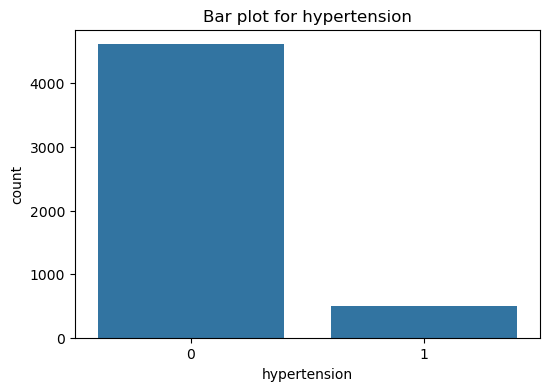

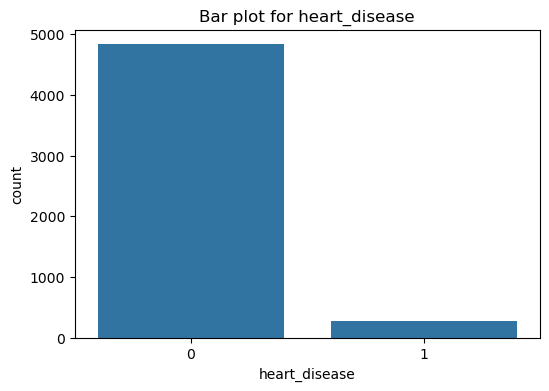

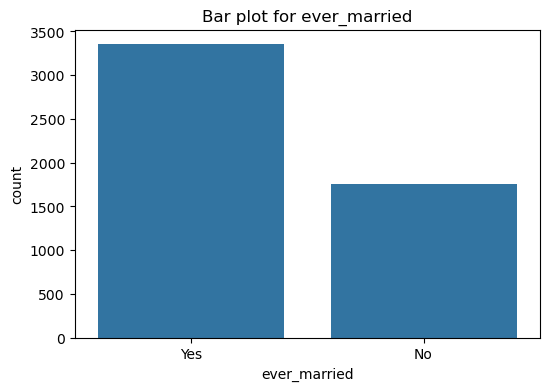

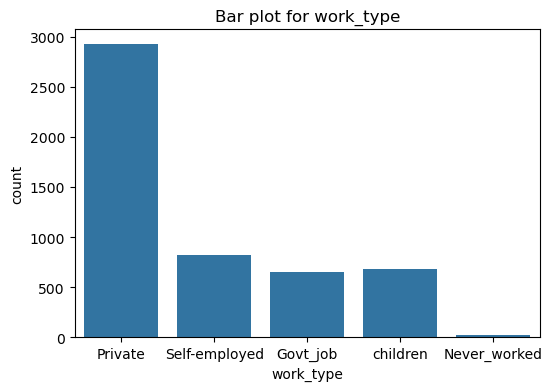

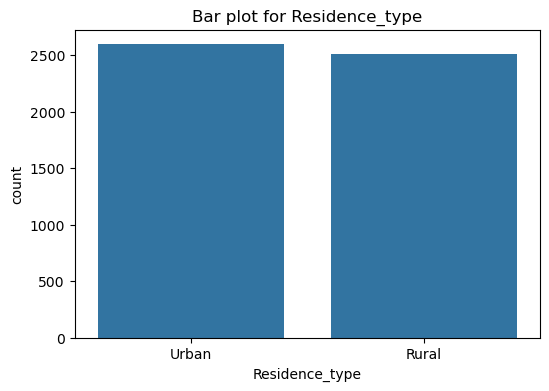

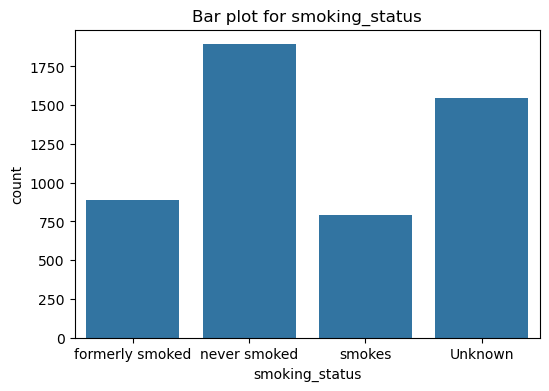

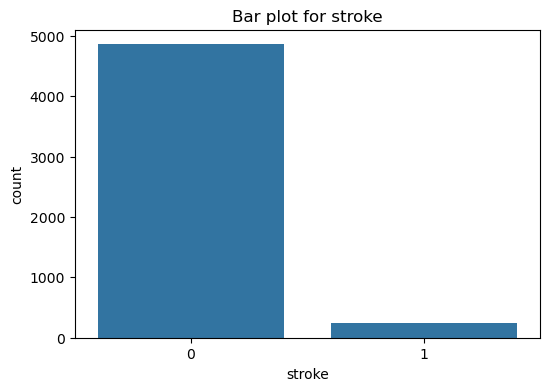

In [103]:
# plot_corr_matrix(df)
plot_dist(df)

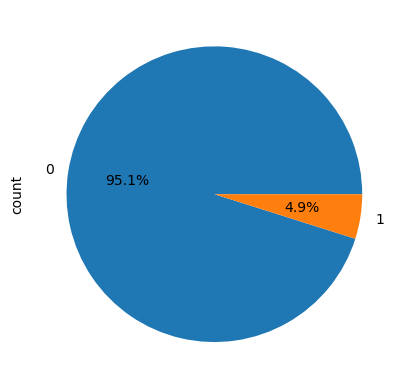

In [104]:
plot_stroke_pie(df)

In [105]:
# Handle missing values for numerical features (fill with median)
num_features = df.select_dtypes(include=["int64", "float64"]).columns
imputer = SimpleImputer(strategy="median")
df[num_features] = imputer.fit_transform(df[num_features])

# Handle missing values for categorical features (fill with mode)
cat_features = df.select_dtypes(include=["object", "category"]).columns
imputer = SimpleImputer(strategy="most_frequent")
df[cat_features] = imputer.fit_transform(df[cat_features])

In [106]:
# Remove rows where 'bmi' is larger than 75
df = df[df["bmi"] <= 80]
# Convert 'Other' gender to 'Female'
df["gender"] = df["gender"].replace("Other", "Female")
print(df.shape)

(5108, 11)


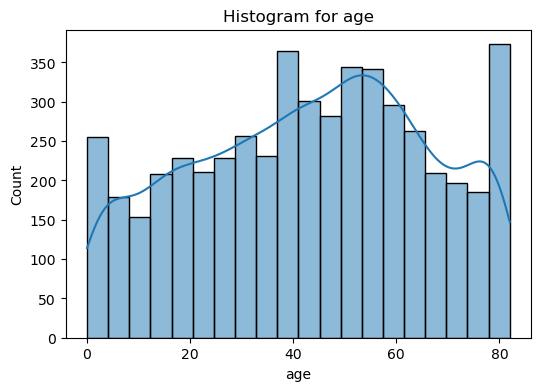

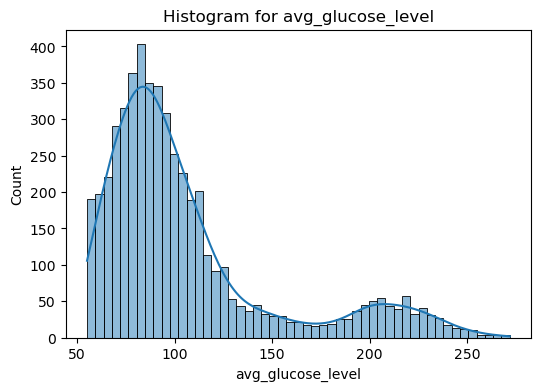

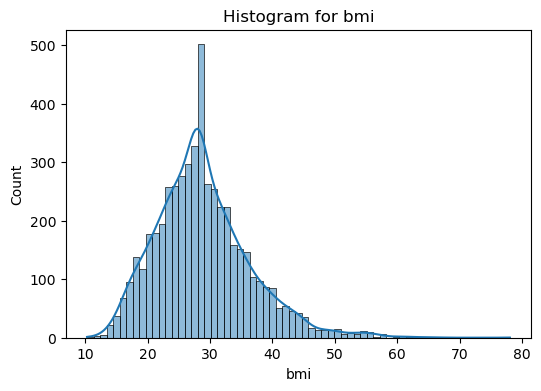

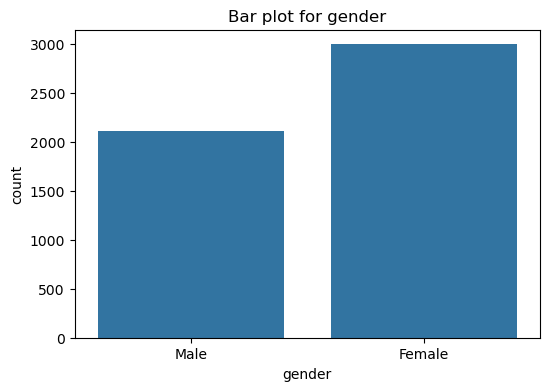

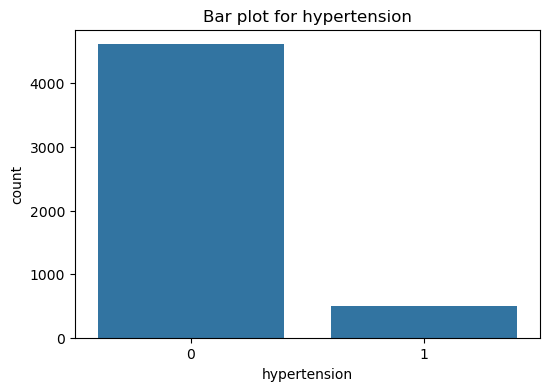

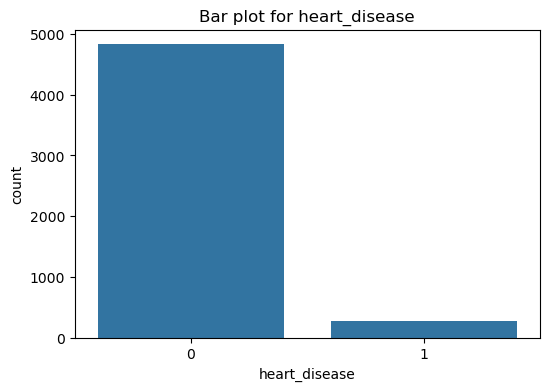

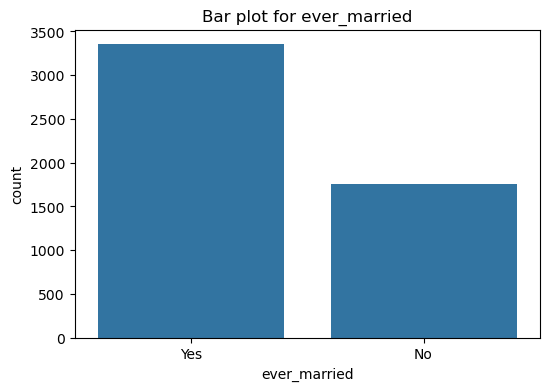

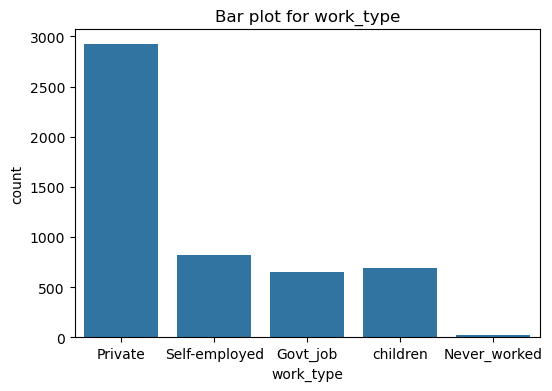

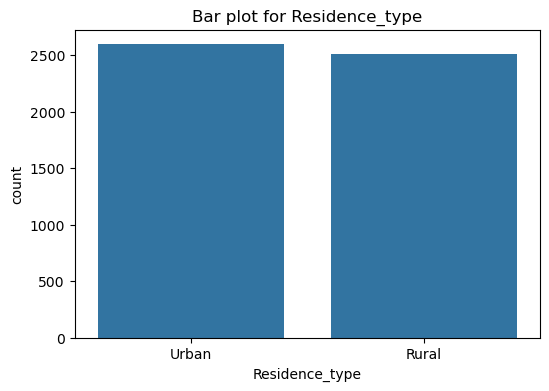

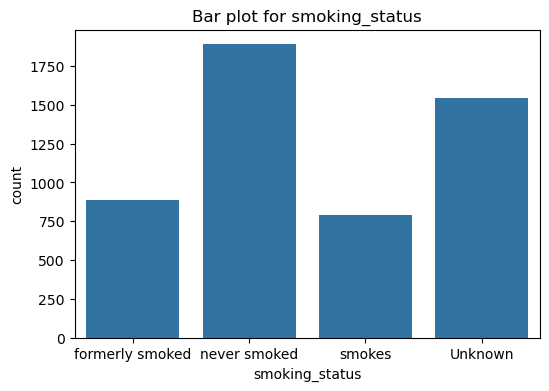

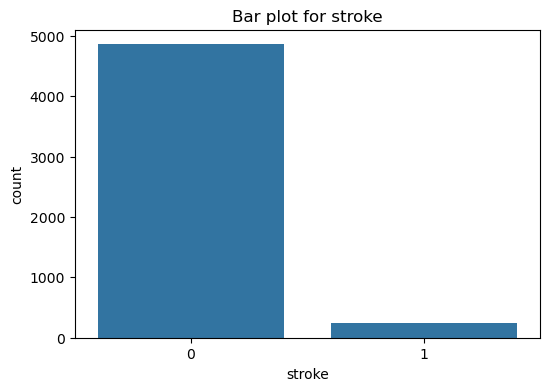

In [107]:
plot_dist(df)

In [108]:
# Apply StandardScaler to numerical features
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

# Apply LabelEncoder to categorical features
encoder = LabelEncoder()
for column in cat_features:
    df[column] = encoder.fit_transform(df[column])

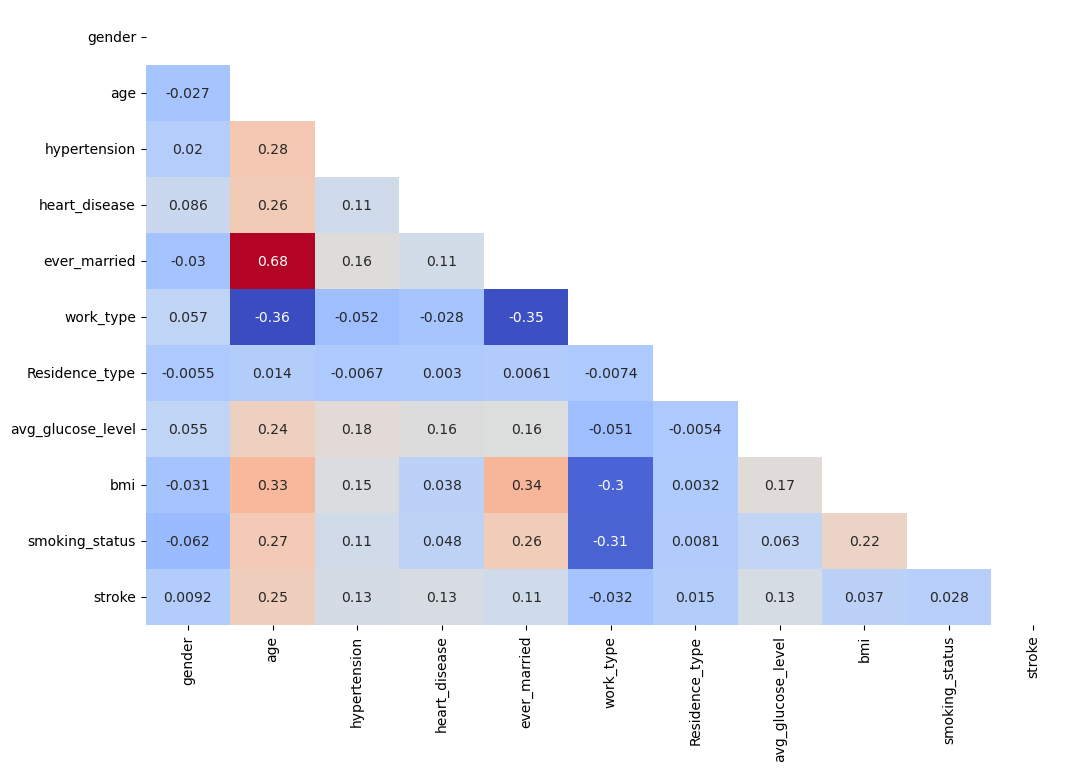

In [109]:
plot_corr_matrix(df)

In [110]:
# Apply SMOTE
smote = SMOTE(sampling_strategy=0.6)
X_smote, y_smote = smote.fit_resample(df.drop("stroke", axis=1), df["stroke"])

In [111]:
# Merge X_smote_df and y_smote_df
df_smote = pd.concat([X_smote, y_smote], axis=1)

(7774, 11)


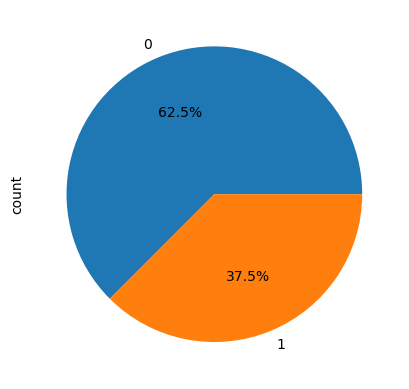

In [112]:
print(df_smote.shape)
plot_stroke_pie(df_smote)

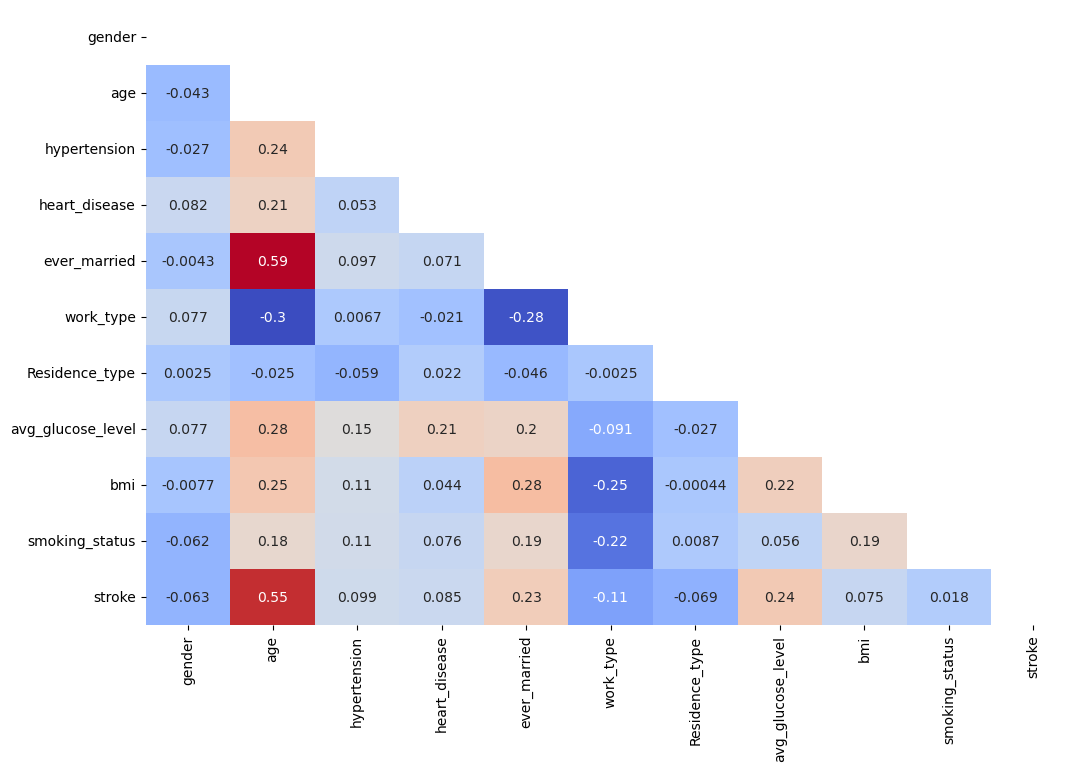

In [113]:
plot_corr_matrix(df_smote)

In [ ]:
plot_dist(df_smote)

In [114]:
# Save df_smote as a CSV file
#df_smote.to_csv("healthcare-dataset-stroke-prep.csv", index=False)